In [1]:
# Enable matplotlib interactive mode
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
# #running the model through EMA workbench
# from ema_workbench import (MultiprocessingEvaluator, ema_logging,
#                        perform_experiments, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy
from ema_workbench import load_results
from ema_workbench.analysis import prim
from ema_workbench.analysis import dimensional_stacking

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\Frenk VanDerKraan\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


<Logger EMA (DEBUG)>

In [2]:
test1 = 'dsfaasdfa'
test2 = ['234234sdf','asdfa']


if type(test2) == list:
    print(test2)
    print('yes')
    
# if len([list(test2)]) > 1:
#     print(test2)
#     print('yes')    

['234234sdf', 'asdfa']
yes


In [3]:
# def find_PRIM(x, outcomes, outcome_name, quantile = 0.95, threshold = 0.5):
#     #     outcomes_values = outcomes['Expected Annual Damage']
#     # Set our output threshold to be the 90th percentile of all of those outputs
#     y_all = outcomes[outcome_name]
#     y_limit = np.quantile(y_all, quantile)

#     # # Only select outputs that are above this threshold
#     y = np.array([value > y_limit for value in y_all])
    
#     # Conduct our prim analysis using a threshold of 0.8
#     prim_object = prim.Prim(x, y, threshold= threshold)

#     #get the PRIM BOX
#     prim_box = prim_object.find_box()
    
#     #visualize the box tradeoff
#     prim_box.show_tradeoff(annotated=True)
#     plt.show()

#     return prim_object, prim_box, y



In [4]:
def find_PRIM(x, outcomes, outcome_name, quantile = 0.95, threshold = 0.5):
    
    if type(outcome_name) == list:
        #create list of zeros to later apply filtering condition
        y = np.array([0] * len(x.index))
        
        
        #loop over the different outcomes we are interested in
        for outcome in outcome_name:    
            
            #select the y values
            y_all = outcomes[outcome]
            
            #find the limit value of the quantile
            y_limit = np.quantile(y_all, quantile)   
            
            #apply filtering condition resuling in a boolean array
            y_filtered = np.array([value > y_limit for value in y_all])

            #sum up the arrays. the number in this array shows for how many quantiles a scenario was above the limit
            y += y_filtered
        
        #if the amount of times the quantile condition was met is equal to the outcomes then a 1 is retured
        y = np.array([1 if n == len(outcome_name) else 0 for n in y])
        
    else:  
        # Set our output threshold to be a percentile of all of those outputs
        y_all = outcomes[outcome_name]
        
        # Set our output threshold to be a percentile of all of those outputs
        y_limit = np.quantile(y_all, quantile)

        # # Only select outputs that are above this threshold
        y = np.array([value > y_limit for value in y_all])

        

    # Conduct our prim analysis using a threshold of 0.8
    prim_object = prim.Prim(x, y, threshold= threshold)

    #get the PRIM BOX
    prim_box = prim_object.find_box()

    #visualize the box tradeoff
    prim_box.show_tradeoff(annotated=True)
    
    plt.show()

    return prim_object, prim_box




# Run the model

In [5]:
# problem_formulation = 1
# scenarios = 4000

# #import the model with the specific problem formulation
# dike_model, planning_steps = get_model_for_problem_formulation(problem_formulation)

# # Set uncertainties and levers variables
# uncertainties = copy.deepcopy(dike_model.uncertainties)
# levers = copy.deepcopy(dike_model.levers)

# def get_do_nothing_dict():
#     return {l.name: 0 for l in dike_model.levers}


# policies = [
#     Policy(
#         "policy 1",
#         **dict(
#             get_do_nothing_dict(),
#             **{"0_RfR 0": 0, "0_RfR 1": 0, "0_RfR 2": 0, "A.1_DikeIncrease 0": 0}
#         )
#     )
# ]

# # ema_logging.log_to_stderr(ema_logging.INFO)

# # Make use of the multiprocessing evaluator to save time
# # running with X scenarios
# with MultiprocessingEvaluator(dike_model, n_processes=7) as evaluator:
#     results = evaluator.perform_experiments(scenarios=scenarios, policies=policies)

# # Save results for later analysis
# from ema_workbench import save_results
# file_name = f'{scenarios}  base scenarios policy pf {problem_formulation}.tar.gz'
# save_results(results, 'results/' + file_name)




# Scenario Discovery


## whole Ijsel area

### run the model PF2

### load pf 1


In [6]:
# Load results that were previously generated
load_file_name ='results/4000  base scenarios policy pf 1.tar.gz'
experiments, outcomes = load_results(load_file_name)

[MainProcess/INFO] results loaded successfully from C:\Users\Frenk VanDerKraan\Documents\TUDelft\final assignment\results\4000  base scenarios policy pf 1.tar.gz


## inspect data

In [7]:
print(outcomes.keys())
display(experiments)

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,115,181.673958,10.0,0.945857,349.494050,10.0,0.183558,286.404381,1.5,0.758775,...,0,0,0,0,0,0,0,0,policy 1,dikesnet
1,101,178.371621,1.0,0.044801,214.916465,1.0,0.968825,84.002282,1.0,0.849359,...,0,0,0,0,0,0,0,1,policy 1,dikesnet
2,11,121.054764,1.0,0.506297,227.905825,1.0,0.975088,341.299309,10.0,0.011926,...,0,0,0,0,0,0,0,2,policy 1,dikesnet
3,59,59.592650,1.5,0.523429,133.868950,1.0,0.557660,332.760792,1.0,0.548853,...,0,0,0,0,0,0,0,3,policy 1,dikesnet
4,52,222.955912,10.0,0.529914,206.145783,1.5,0.216834,150.019274,1.5,0.209465,...,0,0,0,0,0,0,0,4,policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,47,96.809437,1.5,0.704142,145.423106,1.5,0.190900,323.563211,10.0,0.790292,...,0,0,0,0,0,0,0,3995,policy 1,dikesnet
3996,88,265.410842,10.0,0.402281,264.476103,10.0,0.417051,298.386390,10.0,0.888956,...,0,0,0,0,0,0,0,3996,policy 1,dikesnet
3997,86,90.478313,1.0,0.847665,59.915279,1.0,0.584086,236.481583,1.0,0.254731,...,0,0,0,0,0,0,0,3997,policy 1,dikesnet
3998,15,55.311006,1.0,0.455960,279.213285,1.5,0.755093,194.508806,1.0,0.086415,...,0,0,0,0,0,0,0,3998,policy 1,dikesnet


## look into annual damage

### PRIM

[MainProcess/INFO] 4000 points remaining, containing 800 cases of interest
[MainProcess/INFO] mean: 0.9906976744186047, mass: 0.05375, coverage: 0.26625, density: 0.9906976744186047 restricted_dimensions: 5


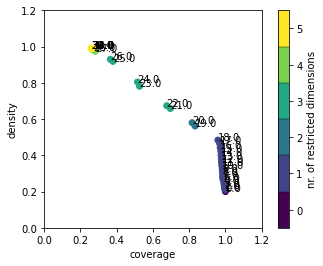

In [8]:
x = experiments.loc[:,:'discount rate 2']
PRIM_ijsel_damage_object, PRIM_ijsel_damage_box =  find_PRIM(x, outcomes, 'Expected Annual Damage', quantile = 0.8, threshold = 0.5)


[<Figure size 432x288 with 1 Axes>]

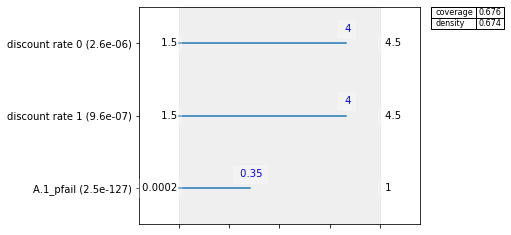

In [9]:
point = 22
PRIM_ijsel_damage_box.inspect(point, 'graph')

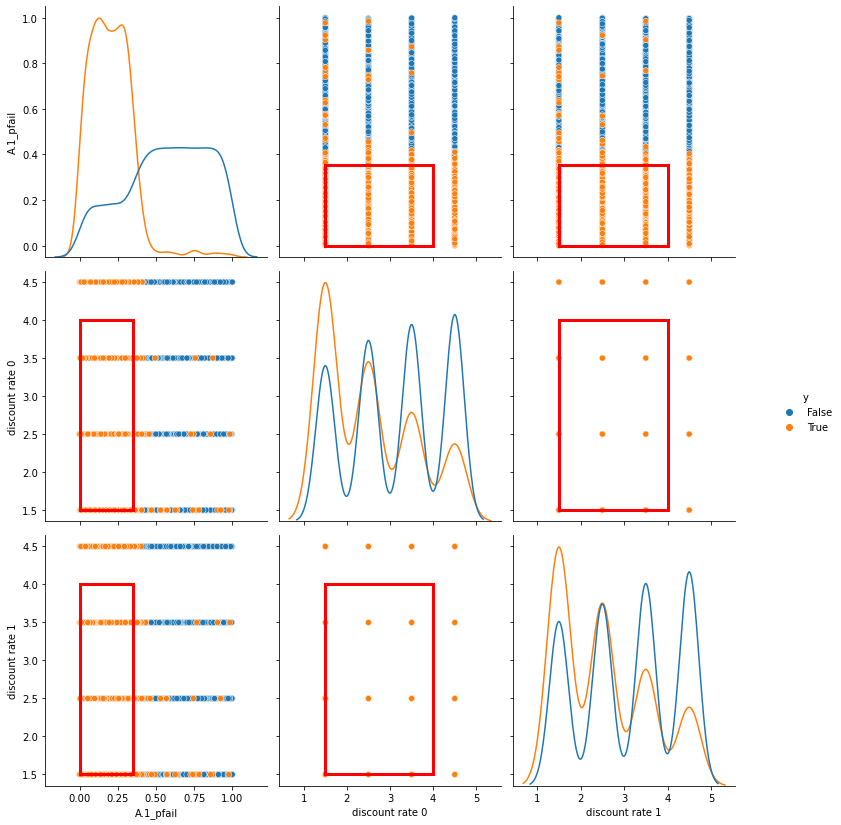

In [10]:
PRIM_ijsel_damage_box.select(point)
PRIM_ijsel_damage_box.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### dimensional stacking

In [11]:
# dimensional_stacking.create_pivot_plot(x, outcomes['Expected Annual Damage'])

## look into annual deaths

[MainProcess/INFO] 4000 points remaining, containing 800 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.11975, coverage: 0.59875, density: 1.0 restricted_dimensions: 3


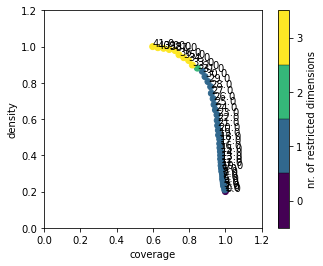

In [12]:
PRIM_ijsel_deaths_object, PRIM_ijsel_deaths_box =  find_PRIM(x, outcomes, 'Expected Number of Deaths', quantile = 0.8, threshold = 0.5)


[<Figure size 432x288 with 1 Axes>]

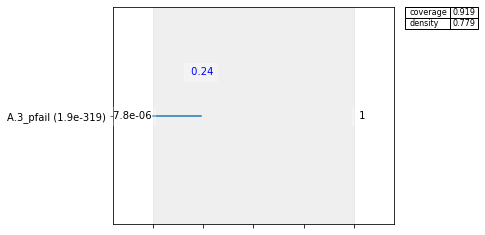

In [13]:
point = 28
PRIM_ijsel_deaths_box.inspect(point, 'graph')

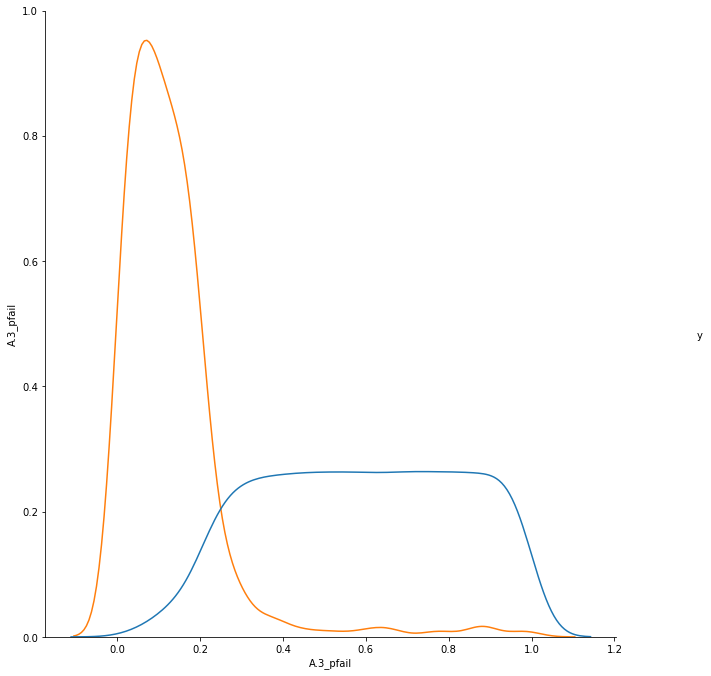

In [14]:
PRIM_ijsel_deaths_box.select(point)
PRIM_ijsel_deaths_box.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## look into comination of deaths and casualties

[MainProcess/INFO] 4000 points remaining, containing 1866 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.16575, coverage: 0.3553054662379421, density: 1.0 restricted_dimensions: 5


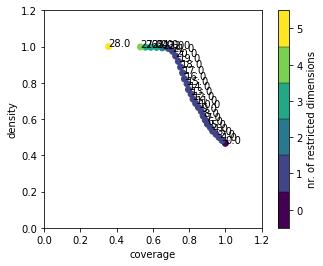

In [15]:
PRIM_ijsel_combined_object, PRIM_ijsel_combined_box  = find_PRIM(x, outcomes, ['Expected Number of Deaths','Expected Annual Damage'], quantile = 0.5, threshold = 0.5)

[<Figure size 432x288 with 1 Axes>]

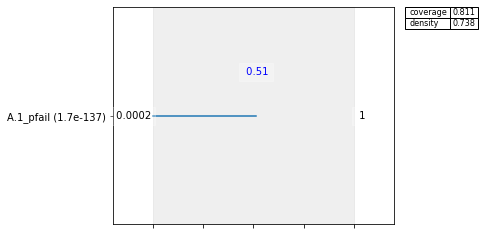

In [16]:
point = 13
PRIM_ijsel_combined_box.inspect(point, 'graph')

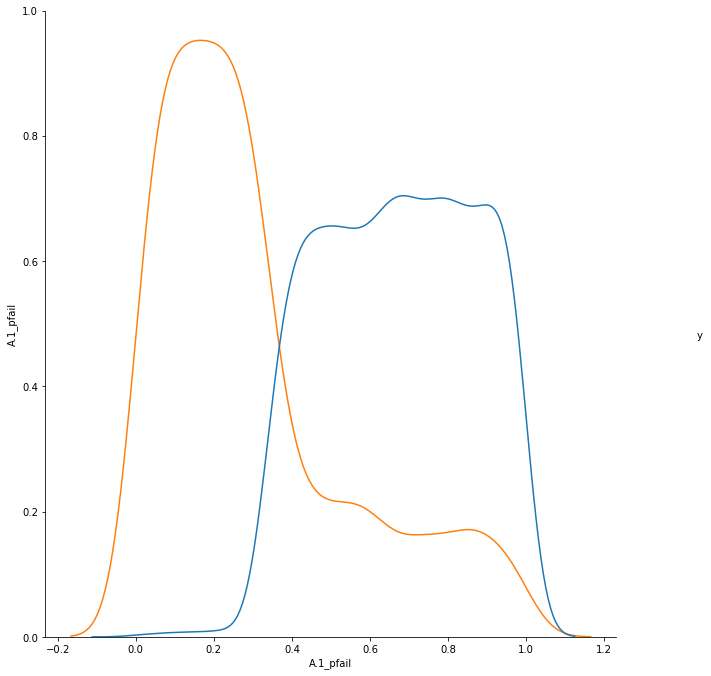

In [17]:
PRIM_ijsel_combined_box.select(point)
PRIM_ijsel_combined_box.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Overijsel area

In [5]:
# from ema_workbench import load_results

# # Load results that were previously generated
# load_file_name ='results/100  scenarios 1 policy pf 3.tar.gz'
# results = load_results(load_file_name)

# # See what the results look like and what outcomes were captured
# experiments, outcomes = results
# print(outcomes.keys())

[MainProcess/INFO] results loaded successfully from C:\Users\frenk\Documents\universiteit\CME jaar 2\2.4 kwartaal 4\model based decision making\final assignment\results\100  scenarios 1 policy pf 3.tar.gz


dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


### import the model PF3

In [16]:
# Load results that were previously generated
load_file_name ='results/4000  base scenarios policy pf 3.tar.gz'
experiments, outcomes = load_results(load_file_name)

[MainProcess/INFO] results loaded successfully from C:\Users\Frenk VanDerKraan\Documents\TUDelft\final assignment\results\4000  base scenarios policy pf 3.tar.gz


In [17]:
# experiments, outcomes = results
print(outcomes.keys())
display(experiments)


dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,31,218.416910,1.5,0.758529,249.380665,1.0,0.579663,76.455316,1.5,0.015850,...,0,0,0,0,0,0,0,0,policy 1,dikesnet
1,119,33.578084,1.5,0.969431,250.076413,1.0,0.905285,261.754102,1.0,0.606421,...,0,0,0,0,0,0,0,1,policy 1,dikesnet
2,10,291.684050,1.0,0.771114,144.855169,1.0,0.463173,106.911678,1.0,0.163265,...,0,0,0,0,0,0,0,2,policy 1,dikesnet
3,49,133.104980,1.0,0.384650,69.526427,1.5,0.914441,279.666357,10.0,0.530577,...,0,0,0,0,0,0,0,3,policy 1,dikesnet
4,3,286.098693,10.0,0.078982,193.135959,1.0,0.893144,47.182791,1.5,0.543908,...,0,0,0,0,0,0,0,4,policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,121,251.814686,1.5,0.841451,313.333153,10.0,0.733286,182.568829,1.0,0.564667,...,0,0,0,0,0,0,0,3995,policy 1,dikesnet
3996,104,96.680122,1.5,0.402793,315.524262,1.0,0.033865,133.084429,1.5,0.503735,...,0,0,0,0,0,0,0,3996,policy 1,dikesnet
3997,107,326.855770,10.0,0.155556,325.329399,1.0,0.215002,201.318521,1.5,0.611371,...,0,0,0,0,0,0,0,3997,policy 1,dikesnet
3998,98,211.456298,10.0,0.243812,325.479483,10.0,0.950388,211.230196,10.0,0.197271,...,0,0,0,0,0,0,0,3998,policy 1,dikesnet


In [18]:
outcomes['A.1 Total Costs']

array([1.01140572e+07, 0.00000000e+00, 1.22143253e+07, ...,
       2.79498711e+09, 3.01613543e+09, 0.00000000e+00])

In [8]:
# outcome_names_overijsel = outcome_names_ring_4 + outcome_names_ring_5
cost_ring_4 = outcomes['A.4 Total Costs']
cost_ring_5 = outcomes['A.5 Total Costs']
fatalities_ring_4 = outcomes['A.4_Expected Number of Deaths']
fatalities_ring_5 = outcomes['A.5_Expected Number of Deaths']


outcomes['overijssel Total Costs'] = cost_ring_4 + cost_ring_5
outcomes['overijssel_Expected Number of Deaths'] = fatalities_ring_4 + fatalities_ring_5

# print(cost_ring_4[5] + cost_ring_5[5])
# print(cost_overijssel[5])


experiments_ring_4 = experiments.loc[:, 'A.4_Bmax':'A.4_pfail']
experiments_ring_5 = experiments.loc[:, 'A.5_Bmax':'A.5_pfail']
experiments_overijsel = experiments.loc[:, 'A.4_Bmax':'A.5_pfail']

### PRIM calculation

In [24]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

# x_arrays = [experiments_ring_4, experiments_ring_5, experiments_overijsel]
# outcome_arrays_ring_4 = [cost_ring_4, fatalities_ring_4]
# outcome_arrays_ring_5 = [cost_ring_5, fatalities_ring_5] 
# outcome_arrays_overijssel = [cost_overijssel, fatalities_overijsel]
# all_outcomes = outcome_arrays_ring_4 + outcome_arrays_ring_5 + outcome_arrays_overijssel
outcome_names_ring_4 = ['A.4 Total Costs', 'A.4_Expected Number of Deaths']
outcome_names_ring_5 = ['A.5 Total Costs', 'A.5_Expected Number of Deaths']

quantile = 0.75

prim_objects = {}

# def find_PRIM(x, outcomes, outcome_name, quantile = 0.95, threshold = 0.5):
#     #     outcomes_values = outcomes['Expected Annual Damage']
#     # Set our output threshold to be the 90th percentile of all of those outputs
#     y_all = outcomes[outcome_name]
#     y_limit = np.quantile(y_all, quantile)

#     # # Only select outputs that are above this threshold
#     y = np.array([value > y_limit for value in y_all])
    
#     # Conduct our prim analysis using a threshold of 0.8
#     prim_alg = prim.Prim(x, y, threshold= threshold)
#     # prim_objects[outcome_name + ' PRIM'] = prim_alg
#     return prim_alg
 
#get the outcomes of ring A4
Prim_cost_ring4 = find_PRIM('A.4 Total Costs', experiments_ring_4)
Prim_deaths_ring4 = find_PRIM('A.4_Expected Number of Deaths', experiments_ring_4)

#get outcomes of ring A5
Prim_cost_ring5 = find_PRIM('A.5 Total Costs', experiments_ring_5)
Prim_deaths_ring5 = find_PRIM('A.5_Expected Number of Deaths', experiments_ring_5)

#get outcomes of overijssel
Prim_cost_overijssel = find_PRIM('overijssel Total Costs', experiments_ring_5)
Prim_deaths_overijssel = find_PRIM('overijssel_Expected Number of Deaths', experiments_overijsel)    
    


[MainProcess/INFO] 4000 points remaining, containing 200 cases of interest
[MainProcess/INFO] mean: 0.5603864734299517, mass: 0.05175, coverage: 0.58, density: 0.5603864734299517 restricted_dimensions: 2


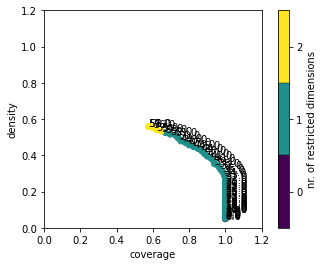

In [25]:
# prim_obj =prim_objects['A.4 Total Costs PRIM']
box1 = Prim_cost_overijssel.find_box()
box1.show_tradeoff(annotated=True)
plt.show()

[MainProcess/INFO] 1000 points remaining, containing 6 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.07407407407407407, returning dump box


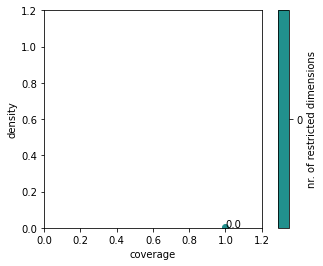

[MainProcess/INFO] 1000 points remaining, containing 6 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.07407407407407407, returning dump box


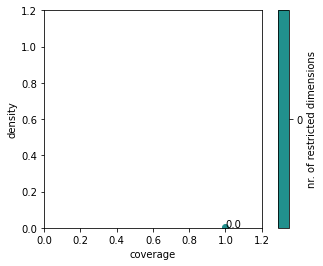

[MainProcess/INFO] 1000 points remaining, containing 64 cases of interest
[MainProcess/INFO] mean: 0.7547169811320755, mass: 0.053, coverage: 0.625, density: 0.7547169811320755 restricted_dimensions: 3


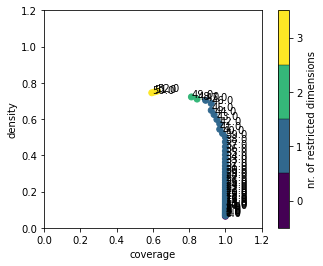

[MainProcess/INFO] 1000 points remaining, containing 64 cases of interest
[MainProcess/INFO] mean: 0.7547169811320755, mass: 0.053, coverage: 0.625, density: 0.7547169811320755 restricted_dimensions: 3


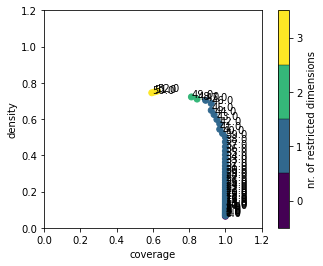

In [31]:
import matplotlib.pyplot as plt

for PRIM in prim_objects.keys():
    # prim_obj =prim_objects['A.4 Total Costs PRIM']
    box1 = prim_objects[PRIM].find_box()
    if box1:
        box1.show_tradeoff(annotated=True)
        plt.show()

In [31]:
# Enable matplotlib interactive mode
# %matplotlib notebook

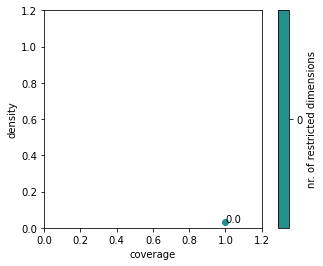

In [9]:
import matplotlib.pyplot as plt

box1.show_tradeoff(annotated=True)
plt.show()

In [33]:
point = 24
box1.inspect(point)

coverage     0.680000
density      0.906667
id          24.000000
mass         0.075000
mean         0.906667
res_dim      2.000000
Name: 24, dtype: float64

             box 24                                 
                min       max qp value      qp value
A.1_pfail  0.000630  0.082080      NaN  2.906888e-58
A.2_pfail  0.000505  0.902799      NaN  2.911428e-01



[None]

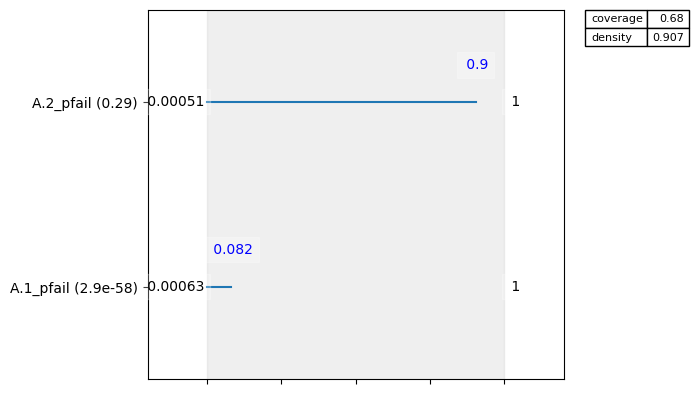

In [34]:
box1.inspect(point, style='graph')
plt.show()